# Python Assignment 3

⏱⏱⏱**Due: 11/02/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace. **Please include all outputs in your notebook, including plots, printouts, etc..**

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

##**For Questions 2a and 2b, you can choose one of them to complete, if you completed both, only Questions 2a will be graded.**

**This assignment is out of 150 points; surplus points can be applied to other assignments (including Matlab and C/C++). However, it cannot be applied to your final project grade, and your assignment grade will not excced 75% of your total grade.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, **include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.** Do not submit a compressed file (.rar, .zip, etc..), submit files separately.

If you are tasked with implementing a numerical algorithm, it is expected that you would not rely on pre-existing methods. For example, if you were asked to solve $Ax=b$, you should write your own program to solve, not just by calling numpy.linalg.solve.



## 2a. Numerical Integration (30 pts)

For a domain discretized into $N$ equally spaced panels:
$$
\Delta x=\frac{b-a}{N}.
$$
The approximation to the integral is
$$\begin{aligned}
\int_a^b f(x) d x & \approx \frac{\Delta x}{2} \sum_{k=1}^N\left(f\left(x_{k-1}\right)+f\left(x_k\right)\right) \\
& =\frac{\Delta x}{2}\left(f\left(x_0\right)+2 f\left(x_1\right)+2 f\left(x_2\right)+2 f\left(x_3\right)+\cdots+2 f\left(x_{N-1}\right)+f\left(x_N\right)\right) \\
& =\Delta x\left(\sum_{k=1}^{N-1} f\left(x_k\right)+\frac{f\left(x_N\right)+f\left(x_0\right)}{2}\right) .
\end{aligned}$$
This is the trapezoid rule scheme.


Given the function $f(x) = 3x^2 + 2x +2$, your tasks are:

1. Carry out the integration symbolically using the SymPy library. Output the result (i.e. print out the result).
2. Implement the trapezoid rule to estimate the integral $\int_{-4}^6 f(x) dx$ using the following values of $N = 10, 20, 40, 80, 160, 320, 640, 1280$. Output the results (i.e. print out the results).
3. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against N.





320
N=10, Estimated integral: 325.0
N=20, Estimated integral: 321.25
N=40, Estimated integral: 320.3125
N=80, Estimated integral: 320.078125
N=160, Estimated integral: 320.01953125
N=320, Estimated integral: 320.0048828125
N=640, Estimated integral: 320.001220703125
N=1280, Estimated integral: 320.00030517578125


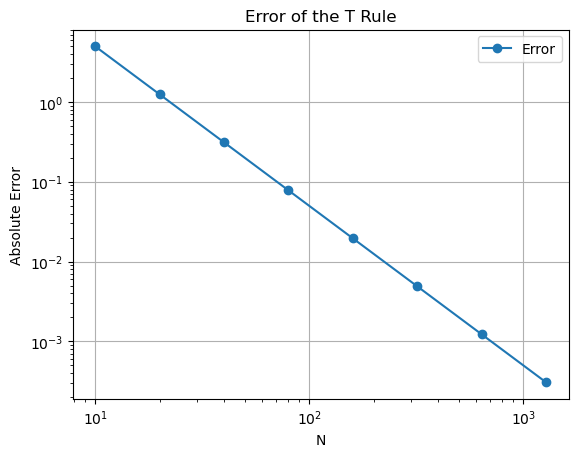

In [8]:
import sympy as sp
#1
# Variable
x = sp.symbols('x')

# Define the function
f = 3*x**2 + 2*x + 2

integrated_f = sp.integrate(f, (x, -4, 6))

print(integrated_f)

#2
def trapezoid_rule(func, a, b, N):
    h = (b - a) / N
    s = 0.5 * (func(a) + func(b))
    
    for k in range(1, N):
        s += func(a + k*h)
    
    return h * s

N_values = [10, 20, 40, 80, 160, 320, 640, 1280]
for N in N_values:
    result = trapezoid_rule(lambda x: 3*x**2 + 2*x + 2, -4, 6, N)
    print(f"N={N}, Estimated integral: {result}")

#3
import matplotlib.pyplot as plt

# Calculate the exact integral value
exact_integral = float(integrated_f)

errors = []
for N in N_values:
    numerical_integral = trapezoid_rule(lambda x: 3*x**2 + 2*x + 2, -4, 6, N)
    error = abs(numerical_integral - exact_integral)
    errors.append(error)

# Plot
plt.loglog(N_values, errors, 'o-', label='Error')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.title('Error of the T Rule')
plt.legend()
plt.grid(True)
plt.show()

## 2b. Numerical Differentiation (30 pts)

Your tasks:
1. Find the closed form expression of $f_{xy}(x,y)$, i.e. $\frac{d^2}{dxdy}f(x,y)$, for $f(x,y) = \left(sin^2\left(x\right)e^xcos(y)\right)$ using `sympy`. Output the result.
2. Find $f_{xy}(2,3)$ with `sympy` and take 15 significant digits, use it as the "groud truth solution". Output the result.
3. Approximate $f_{xy}(2,3)$ using central difference approximation for the following values of $h = 0.1, 0.01, 0.001, 0.0001$. Output the results.
4. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against the step size $h$. `plt.gca().invert_xaxis() ` might help.

Recall from the lecture:
$$f_{x y}(x, y) \approx \frac{f(x+h, y+k)-f(x+h, y-k)-f(x-h, y+k)+f(x-h, y-k)}{4 h k}.$$
For simplicity, we set $k = h$.

-2*exp(cos(y))*sin(x)*sin(y)*cos(x)
0.0396846787973247
h=0.1, Approximated f_xy(2,3): 0.0395514085320611
h=0.01, Approximated f_xy(2,3): 0.0396833492574689
h=0.001, Approximated f_xy(2,3): 0.0396846654981964
h=0.0001, Approximated f_xy(2,3): 0.0396846777661608


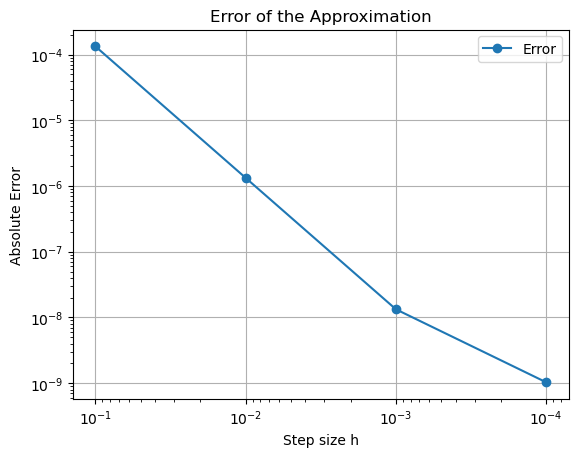

In [9]:
import sympy as sp
#1
# Define the variables
x, y = sp.symbols('x y')

# Define the function
f = sp.sin(x)**2 * sp.exp(sp.cos(y))

# Compute the second partial derivative
f_xy = sp.diff(f, x, y)

print(f_xy)

#2
f_xy_value = f_xy.evalf(subs={x: 2, y: 3}, n=15)

print(f_xy_value)

#3
def central_difference(f, x0, y0, h, k):
    return (f.subs({x: x0 + h, y: y0 + k}) - f.subs({x: x0 + h, y: y0 - k})
            - f.subs({x: x0 - h, y: y0 + k}) + f.subs({x: x0 - h, y: y0 - k})) / (4 * h * k)

h_values = [0.1, 0.01, 0.001, 0.0001]
approximations = []

for h in h_values:
    approx = central_difference(f, 2, 3, h, h)
    approximations.append(approx)
    print(f"h={h}, Approximated f_xy(2,3): {approx}")

#4
import matplotlib.pyplot as plt

errors = [abs(approx - f_xy_value) for approx in approximations]

plt.loglog(h_values, errors, 'o-', label='Error')
plt.gca().invert_xaxis()  # as mentioned, invert the x-axis
plt.xlabel('Step size h')
plt.ylabel('Absolute Error')
plt.title('Error of the Approximation')
plt.legend()
plt.grid(True)
plt.show()



## 3. Pandas I (15 pts)

1. Create a 3x4 (3 rows by 4 columns) pandas DataFrame with the columns named after the following Long Island towns: Hempstead, Babylon, Islip, and Brookhaven. The rows represent 'Population in 2099', 'Population in 2300', 'Population in 2400'. Fill each of the 12 cells in the DataFrame with a random integer from 1000 to 10000, inclusive. `np.random.randint()` might be helpful.
For Example:

```
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2931     8043   8414        8661
Population in 2300       5444     9227   7393        8007
Population in 2400       1660     7977   4730        2940
```



2. Output the following:
  - The entire DataFrame.
  - The value in the cell of row #1 (indexing starts with 0) under the Hempstead column.

3. Add a new column named Riverhead. Populate this column with the sum of the respective row values from the Islip and Brookhaven columns. Output the entire DataFrame again.

In [12]:
import pandas as pd
import numpy as np
#1
# Create the DataFrame
data = {
    'Hempstead': np.random.randint(1000, 100001, 3),
    'Babylon': np.random.randint(1000, 100001, 3),
    'Islip': np.random.randint(1000, 100001, 3),
    'Brookhaven': np.random.randint(1000, 100001, 3)
}
df = pd.DataFrame(data, index=['Population in 2099', 'Population in 2300', 'Population in 2400'])
#2 Output the entire DataFrame
print(df)

#2 The value in the cell of row #1
value = df.loc['Population in 2300', 'Hempstead']
print(f"Value in row #1 under Hempstead: {value}")

#3
df['Riverhead'] = df['Islip'] + df['Brookhaven']
print(df)

                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099      63468    97091  57245        3839
Population in 2300      68426    92699  10321       64138
Population in 2400      15688    61852  25098       11543
Value in row #1 under Hempstead: 68426
                    Hempstead  Babylon  Islip  Brookhaven  Riverhead
Population in 2099      63468    97091  57245        3839      61084
Population in 2300      68426    92699  10321       64138      74459
Population in 2400      15688    61852  25098       11543      36641


## 4. Pandas II (15 pts)

0. Download the cvs file that comes with this assignment, and read it into a dataframe. You can also download this [csv file](https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv) with this link.
1. Arrange the data in alphabetical order based on the last name. Display the first few rows.
2. Count the number of customers whose subscription date is in 2021 (2021-01-01 to 2021-12-31). Report this number (e.g. print).

In [17]:
import pandas as pd

# 0. Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\79491\Desktop\customers-100.csv')

# 1. Sort the data based on the last name
df_sorted = df.sort_values(by='Last Name')

# 1. Display the first few rows
print(df_sorted.head())

# 2. Count the number of customers whose subscription date is in 2021
count_2021 = df_sorted[(df_sorted['Subscription Date'] >= '2021-01-01') & (df_sorted['Subscription Date'] <= '2021-12-31')].shape[0]
print(f"Number of customers whose subscription date is in 2021: {count_2021}")

    Index      Customer Id First Name Last Name                Company  \
67     68  a014Ec1b9FccC1E        Tom  Alvarado    Donaldson-Dougherty   
96     97  CeD220bdAaCfaDf       Lynn  Atkinson  Ware, Burns and Oneal   
92     93  aAb6AFc7AfD0fF3     Collin     Ayers          Lamb-Peterson   
0       1  DD37Cf93aecA6Dc     Sheryl    Baxter        Rasmussen Group   
15     16  8cad0b4CBceaeec    Miranda   Beasley     Singleton and Sons   

                City    Country             Phone 1                Phone 2  \
67  South Sophiaberg   Kiribati  (585)606-2980x2258      730-797-3594x5614   
96      New Bradview  Sri Lanka     +1-846-706-2218           605.413.3198   
92      South Lonnie   Anguilla    404-645-5351x012  001-257-582-8850x8516   
0       East Leonard      Chile        229.077.5154       397.884.0519x718   
15      Desireeshire       Oman    540.085.3135x185  +1-600-462-6432x21881   

                            Email Subscription Date  \
67  nicholsonnina@montgomery.in

## 5. LU decomposition (50 + 30 pts)


Part A (50 points)
1. Write a function `LUdecomposition()` that takes as input a matrix $A\in \mathbb{R}^{n \times n}$. Perform Gaussian Elimination to have this function return two matrices $L$ and $U$ such that $A=LU$.
2. Your function should raise any relevant errors, for example, raise an error if a pure LU decomposition does not exist for $A$ (meaning that you have to perform pivoting, i.e., permutation of rows).
3. Create several random matrices for the purpose of testing your function. Obtain the $L$ and $U$ matrices, and for each random matrix obtain its L and U matrices and perform a matrix multiplication (`np.matmul()`) to determine whether the outcome closely resembles the original matrix $A$, allowing for slight differences attributable to precision errors.


Note: LU decomposition with Gaussian elimination should be covered in your undergraduate linear algebra class. It is also covered in AMS 510. If you do not know how, this 10 minute [video](https://www.youtube.com/watch?v=UlWcofkUDDU&ab_channel=Mathispower4u) explains it very well.

Part B (30 bonus points)
4. Not all square matrices have a pure LU decomposition. However, PLU decomposition always exists. Write another function `pivoting()` that takes as input a matrix $A$ and return the permutation/pivoting matrix $P$ such that $PA$ always has a pure LU decomposition.
5. Find an example $A$ for which `LUdecomposition()` raises an error. Then, use `pivoting()` to find $P$, and find the pure LU decomposition of $PA$. Verify that indeed $PA = LU$ with matrix multiplication (`np.matmul()`).


Hint: Please do not print out a giant matrix and visually examine the outcomes. Think of a way to verify your results and output a boolean value.


In [6]:
import numpy as np
#Part A
def LUdecomposition(A):
    n = len(A)
    L = np.zeros((n,n))
    U = np.zeros((n,n))

    for i in range(n):
        L[i][i] = 1
        
        # Check for zero diagonal elements
        if np.isclose(A[i][i], 0):
            raise ValueError("Pivoting required for LU decomposition.")
        
        for k in range(i, n):
            sum = 0
            for j in range(i):
                sum += L[i][j] * U[j][k]
            U[i][k] = A[i][k] - sum
        
        for k in range(i, n):
            if i == k:
                L[i][i] = 1
            else:
                sum = 0
                for j in range(i):
                    sum += L[k][j] * U[j][i]
                L[k][i] = (A[k][i] - sum) / U[i][i]

    return L, U

def verify_decomposition(A, L, U):
    reconstructed_A = np.matmul(L, U)
    return np.allclose(A, reconstructed_A, atol=1e-8)

# Test
A = np.random.rand(2,2)
try:
    L, U = LUdecomposition(A)
    print("Original Matrix:\n", A)
    print("\nL Matrix:\n", L)
    print("\nU Matrix:\n", U)
    print("\nDoes LU resemble A?:", verify_decomposition(A, L, U))
except ValueError as e:
    print(e)
    
#Patr B
def pivoting(A):
    n = len(A)
    P = np.identity(n)
    for i in range(n):
        max_row_index = np.argmax(abs(A[i:, i])) + i
        if i != max_row_index:
            A[[i, max_row_index]] = A[[max_row_index, i]]
            P[[i, max_row_index]] = P[[max_row_index, i]]
    return P

def verify_decomposition(A, L, U, P=None):
    if P is None:
        return np.allclose(A, np.matmul(L, U))
    else:
        return np.allclose(A, np.matmul(np.matmul(P, L), U))

# Test
A = np.array([[11, 9, 24, 2], [1, 5, 2, 6], [3, 17, 18, 1], [2, 5, 7, 1]])
P = pivoting(A)
L, U = LUdecomposition(np.matmul(P, A))
is_decomposition_correct = verify_decomposition(A, L, U, P)

print("Is PLU decomposition correct?", is_decomposition_correct)



Original Matrix:
 [[0.79835038 0.54425416]
 [0.03060154 0.97095719]]

L Matrix:
 [[1.         0.        ]
 [0.03833096 1.        ]]

U Matrix:
 [[0.79835038 0.54425416]
 [0.         0.9500954 ]]

Does LU resemble A?: True
Is PLU decomposition correct? False


Fact: LU and PLU decompositions are not unique.

## 6. Markov Chain (30 pts)

**BACKGROUND:** Consider a Markov chain transition matrix $P$ on a set of $n$ states, where $P_{i j}$ corresponds to the probability $\left(0 \leq P_{i j} \leq 1\right)$ to go from state $i$ to the state $j$, and each row is normalized so that
$$
\sum_{j=1}^n P_{i j}=1 .
$$

Let $p$ be a size- $n$ vector composed of the probability distribution over the $n$ states, where
$$
\sum_{j=1}^n p_j=1 .
$$

The transition rule corresponding to the transition matrix $P$ is $\hat{p}=P^T p$, where $\hat{p}$ corresponds to a new probability distribution and
$$
\sum_{j=1}^n \hat{p}_j=1 .
$$
TASK: Write a program that works with 5 states `only use the numpy library`. In particular,
0. Fix the random seed to be the last digit of your id: `numpy.random.seed()`.

1. Construct a random $5 \times 5$ matrix $P$, and normalize each row so that
$$
\sum_{j=1}^5 P_{i j}=1 .
$$

2. Construct a random size-5 vector $p$ and normalize it so that
$$
\sum_{j=1}^5 p_j=1 .
$$
Apply the transition rule 50 times to obtain $p_{50}$.
3. Compute the eigenvector $v$ of $P^T$ corresponding to the eigenvalue 1 (and numerically, the eigenvalue closest to $1)$, and then scale the eigenvector so that
$$
\sum_{j=1}^5 v_j=1 .
$$
This scaled eigenvector is known as the stationary distribution.

4. Compute the component wise difference between $p_{50}$ and the stationary distribution. Do they match with each other within $1 \mathrm{e}-5$ ?

HINTS: You may find the following functions useful in your implementation:
- np.random.rand
- np.dot
- np.linalg.eig

In [7]:
import numpy as np

# Fix the random seed with the last digit of my id(2)
np.random.seed(2)

# Construct a random 5x5 matrix P and normalize
P = np.random.rand(5, 5)
P = P / P.sum(axis=1)[:, np.newaxis]

# Construct a random size-5 vector p and normalize
p = np.random.rand(5)
p = p / p.sum()

# Apply the transition rule 50 times
for _ in range(50):
    p = np.dot(p, P)

# Compute the eigenvector v
eigenvalues, eigenvectors = np.linalg.eig(P.T)
v = eigenvectors[:, np.argmax(eigenvalues)]
v = np.real(v / v.sum())

# Compute the difference between p^50 and the stationary distribution
difference = p - v

# Check if the difference matches with each other within 1e-5
matches = np.allclose(p, v, atol=1e-5)

print("Matrix P:\n", P)
print("\nInitial vector p:\n", p)
print("\nStationary distribution v:\n", v)
print("\nDifference between p^50 and v:\n", difference)
print("\nDo p^50 and v match within 1e-5?", matches)


Matrix P:
 [[0.23349275 0.01388454 0.2943663  0.2331326  0.22512381]
 [0.19197294 0.11893085 0.35988718 0.17414328 0.15506575]
 [0.31324929 0.26685616 0.06787116 0.25900696 0.09301644]
 [0.25666609 0.27909931 0.16152828 0.2766763  0.02603002]
 [0.41334137 0.05341083 0.35024649 0.07897185 0.10402946]]

Initial vector p:
 [0.27315399 0.15136211 0.22991378 0.2204666  0.12510351]

Stationary distribution v:
 [0.27315399 0.15136211 0.22991378 0.2204666  0.12510351]

Difference between p^50 and v:
 [7.77156117e-16 4.16333634e-16 5.55111512e-16 5.82867088e-16
 4.44089210e-16]

Do p^50 and v match within 1e-5? True
